# Requirements

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

Mon Jan 23 08:24:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0    26W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-_dgrzh7a
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-_dgrzh7a
  Resolved https://github.com/facebookresearch/detectron2.git to commit 58e472e076a5d861fdcf773d9254a3664e045bf8
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 KB 806.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 78.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 KB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 KB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.0 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=50e9e77ddbc6cc846147d337098c7a3504e3e926fe04964fdb7c7bbf5c5f7d4c
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pypars

# Dataset

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("mepublic").project("numbers-jom0d")
dataset = project.version(6).download("coco")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to numbers-6 in coco:: 100%|██████████| 448/448 [00:00<00:00, 1095.73it/s]


# Model

In [6]:
import os
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data.catalog import DatasetCatalog

In [7]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("my_dataset_train", {}, "/content/numbers-6/train/_annotations.coco.json", "/content/numbers-6/train")
register_coco_instances("my_dataset_val", {}, "/content/numbers-6/valid/_annotations.coco.json", "/content/numbers-6/valid")
register_coco_instances("my_dataset_test", {}, "/content/numbers-6/test/_annotations.coco.json", "/content/numbers-6/test")

WARNING [01/23 08:28:24 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[01/23 08:28:24 d2.data.datasets.coco]: Loaded 36 images in COCO format from /content/numbers-6/valid/_annotations.coco.json


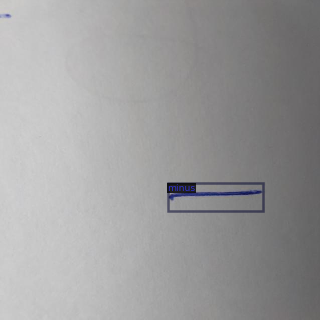

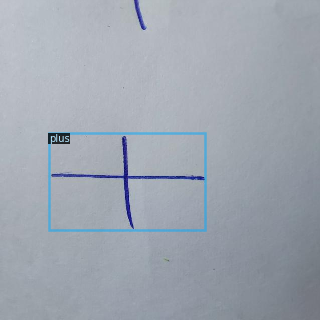

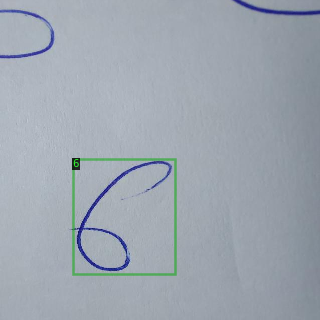

In [8]:
#visualize training data
my_dataset_train_metadata = MetadataCatalog.get("my_dataset_val")
dataset_dicts = DatasetCatalog.get("my_dataset_val")

import random
from detectron2.utils.visualizer import Visualizer

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=my_dataset_train_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [9]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_C4_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ("my_dataset_val",)

cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_C4_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 8
cfg.SOLVER.BASE_LR = 0.001


cfg.SOLVER.WARMUP_ITERS = 1000
cfg.SOLVER.MAX_ITER = 3000 #adjust up if val mAP is still rising, adjust down if overfit
cfg.SOLVER.GAMMA = 0.05

cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 5 + 1 # 1 for back ground

cfg.TEST.EVAL_PERIOD = 500

In [10]:
import os

In [11]:
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator

class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [12]:
os.makedirs(cfg.OUTPUT_DIR , exist_ok = True)
trainer = CocoTrainer(cfg)
trainer.resume_or_load(resume = False)

[01/23 08:28:48 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): ResNet(
    (stem): BasicStem(
      (conv1): Conv2d(
        3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
        (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
      )
    )
    (res2): Sequential(
      (0): BottleneckBlock(
        (shortcut): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
        )
        (conv1): Conv2d(
          64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv2): Conv2d(
          64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv3): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
 

model_final_298dad.pkl: 212MB [00:09, 22.7MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


In [13]:
trainer.train()

[01/23 08:29:04 d2.engine.train_loop]: Starting training from iteration 0


torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)


[01/23 08:29:50 d2.utils.events]:  eta: 1:34:53  iter: 19  total_loss: 3.03  loss_cls: 1.985  loss_box_reg: 0.7724  loss_rpn_cls: 0.2307  loss_rpn_loc: 0.06393  time: 1.8992  data_time: 0.1122  lr: 1.9981e-05  max_mem: 6354M
[01/23 08:30:29 d2.utils.events]:  eta: 1:35:05  iter: 39  total_loss: 2.164  loss_cls: 1.273  loss_box_reg: 0.8321  loss_rpn_cls: 0.1153  loss_rpn_loc: 0.04932  time: 1.9168  data_time: 0.1052  lr: 3.9961e-05  max_mem: 6354M
[01/23 08:31:08 d2.utils.events]:  eta: 1:35:28  iter: 59  total_loss: 1.635  loss_cls: 0.66  loss_box_reg: 0.8425  loss_rpn_cls: 0.06513  loss_rpn_loc: 0.03995  time: 1.9359  data_time: 0.0985  lr: 5.9941e-05  max_mem: 6354M
[01/23 08:31:47 d2.utils.events]:  eta: 1:35:49  iter: 79  total_loss: 1.643  loss_cls: 0.6093  loss_box_reg: 0.9267  loss_rpn_cls: 0.05821  loss_rpn_loc: 0.0448  time: 1.9445  data_time: 0.1022  lr: 7.9921e-05  max_mem: 6354M
[01/23 08:32:27 d2.utils.events]:  eta: 1:36:03  iter: 99  total_loss: 1.549  loss_cls: 0.542  l

In [14]:
import shutil
shutil.copy("./output/model_final.pth" , "./drive/MyDrive/Project/model_final_8.pth")

'./drive/MyDrive/Vida_Project/model_final_8.pth'

# Load for test

In [15]:
cfg.MODEL.WEIGHTS = "./drive/MyDrive/Project/model_final_8.pth"

In [16]:
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

#cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
predictor = DefaultPredictor(cfg)
evaluator = COCOEvaluator("my_dataset_test", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "my_dataset_test")
inference_on_dataset(trainer.model, val_loader, evaluator)

[01/23 10:10:40 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./drive/MyDrive/Vida_Project/model_final_8.pth ...
WARNING [01/23 10:10:40 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
WARNING [01/23 10:10:40 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[01/23 10:10:40 d2.data.datasets.coco]: Loaded 20 images in COCO format from /content/numbers-6/test/_annotations.coco.json
[01/23 10:10:40 d2.data.build]: Distribution of instances among all 6 categories:
|  category  | #instances   |  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|:----------:|:-------------|
|  numbers   | 0            |     2      | 5            |     4      | 7            |
|     6      | 21           |   minus    | 1            |    plus    | 4            |
|

OrderedDict([('bbox',
              {'AP': 38.48885459974569,
               'AP50': 92.57425742574257,
               'AP75': 16.148900604346146,
               'APs': nan,
               'APm': 42.67725673666268,
               'APl': 41.00247524752475,
               'AP-numbers': nan,
               'AP-2': 40.633663366336634,
               'AP-4': 52.31966053748233,
               'AP-6': 35.431543154315435,
               'AP-minus': 30.0,
               'AP-plus': 34.05940594059406})])

# Calc_Equation

In [17]:
import matplotlib.pyplot as plt
from detectron2.utils.visualizer import ColorMode
from sklearn.cluster import KMeans
import glob

[01/23 11:23:20 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./drive/MyDrive/Vida_Project/model_final_8.pth ...


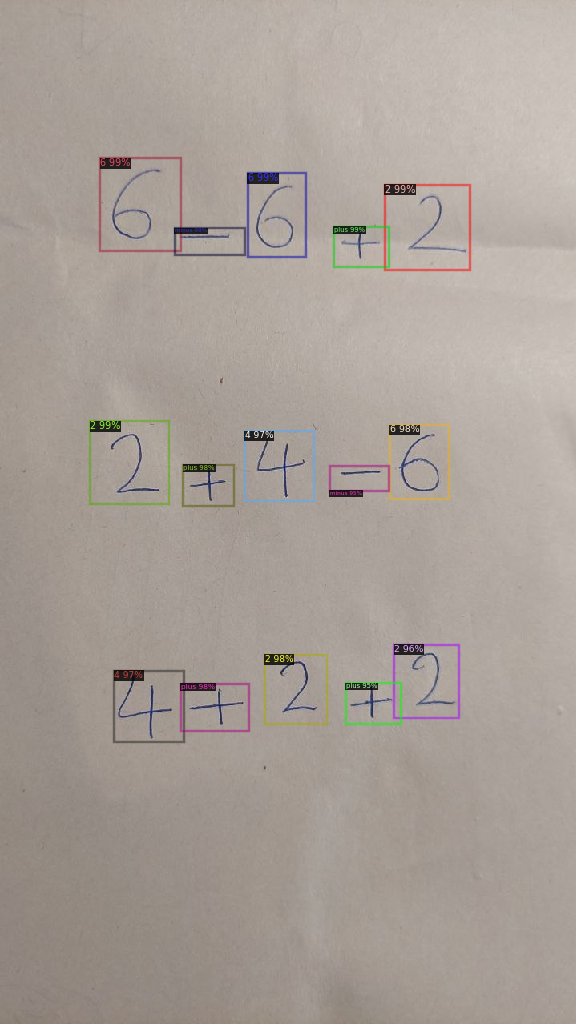

In [48]:
#cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.DATASETS.TEST = ("my_dataset_test", )
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.6   # set the testing threshold for this model
predictor = DefaultPredictor(cfg)
test_metadata = MetadataCatalog.get("my_dataset_test")

# main detection
im = cv2.imread('/content/w4.jpg')
h , w , c = im.shape
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1],
                metadata=test_metadata, 
                scale=0.8
                 )
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
out_image = np.array(out.get_image()[:, :, ::-1])
cv2_imshow(out_image)
out_image = cv2.resize(out_image , (im.shape[1] , im.shape[0]))

# Clustering for detecting equations
X = []
for element in outputs['instances'].pred_boxes.to("cpu").tensor:
    X.append((element[0] , element[1]))

X = np.array(X)

In [49]:
n_clusters = 3 #### important
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)

'''
plt.scatter(X[:, 0], X[:, -1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.show()
'''

"\nplt.scatter(X[:, 0], X[:, -1])\nplt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')\nplt.show()\n"

In [50]:
eqs = [[] for _ in range(n_clusters)]
eqs

[[], [], []]

[2, '+', 4, '-', 6]
[6, '-', 6, '+', 2]
[4, '+', 2, '+', 2]


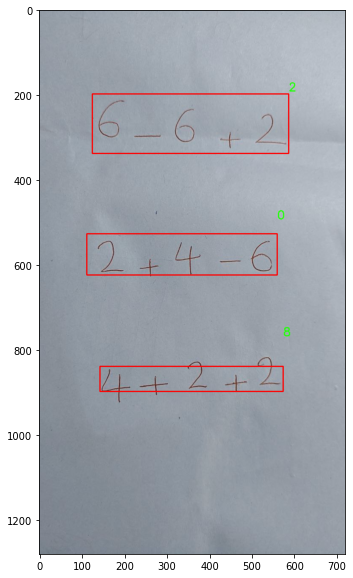

In [51]:
for i in range(X.shape[0]):
    this_label = kmeans.labels_[i]
    eqs[this_label].append((outputs['instances'].pred_boxes.to("cpu").tensor[i] , outputs['instances'].pred_classes[i]))

thing_classes = ['' , 2 , 4 , 6 , "-" , "+"]
flag = False
for eq in eqs:
    
    this_locs = np.array([x[0].numpy() for x in eq])
    this_labels = [x[1] for x in eq]
    
    # Sort boxes left to right
    sorted_idx = np.argsort(this_locs[:, 0])
    sorted_labels_idx = [this_labels[label_idx] for label_idx in sorted_idx]
    sorted_labels = [thing_classes[label_idx.item()] for label_idx in sorted_labels_idx]
    print(sorted_labels)
    for i in range(0 , len(sorted_labels)-1 , 2):
        if isinstance(sorted_labels[i], int) and isinstance(sorted_labels[i+1], str) :
            continue
        else:
            flag = True
    if flag == True:
        flag = False
        result = "can not compute"
    else:        
        result = eval(' '.join(str(x) for x in sorted_labels))
    
    first_box = this_locs[sorted_idx[0]]
    last_box = this_locs[sorted_idx[-1]]

    h = first_box[3] - first_box[1]

    cv2.rectangle(im , (int(first_box[0]) ,int(first_box[1])) , (int(last_box[2]) ,int(last_box[3])) ,color = (255 , 0 , 0), thickness = 2)
    cv2.putText(im, str(result), (int(last_box[2]) ,int(last_box[1]) - 40 ), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

fig = plt.figure(figsize= (20 , 10))
plt.imshow(im)